In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
lblen = LabelEncoder()
df["ShelveLoc"]= lblen.fit_transform(df["ShelveLoc"])
df["Urban"]= lblen.fit_transform(df["Urban"])
df["US"]= lblen.fit_transform(df["US"])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [6]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

In [172]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [173]:
y_pred=model.predict(x_test)

In [174]:
mape(y_test,y_pred)

0.3468017509465052

In [175]:
np.mean(abs(y_test-y_pred)/y_test)

0.34680175094650534

In [176]:
abs(y_test-y_pred)/y_test
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


[Text(237.66666666666669, 498.3, 'Price <= 94.5\nmse = 8.383\nsamples = 280\nvalue = 7.638'),
 Text(82.66666666666667, 407.70000000000005, 'ShelveLoc <= 0.5\nmse = 6.831\nsamples = 43\nvalue = 10.335'),
 Text(20.666666666666668, 317.1, 'Income <= 23.0\nmse = 4.966\nsamples = 9\nvalue = 7.863'),
 Text(10.333333333333334, 226.5, 'mse = 0.0\nsamples = 1\nvalue = 3.02'),
 Text(31.0, 226.5, 'Education <= 10.5\nmse = 2.288\nsamples = 8\nvalue = 8.469'),
 Text(20.666666666666668, 135.89999999999998, 'mse = 0.0\nsamples = 1\nvalue = 11.67'),
 Text(41.333333333333336, 135.89999999999998, 'Income <= 52.0\nmse = 0.941\nsamples = 7\nvalue = 8.011'),
 Text(31.0, 45.299999999999955, 'mse = 0.122\nsamples = 3\nvalue = 7.02'),
 Text(51.66666666666667, 45.299999999999955, 'mse = 0.266\nsamples = 4\nvalue = 8.755'),
 Text(144.66666666666669, 317.1, 'ShelveLoc <= 1.5\nmse = 5.28\nsamples = 34\nvalue = 10.989'),
 Text(103.33333333333334, 226.5, 'CompPrice <= 120.5\nmse = 3.655\nsamples = 13\nvalue = 12.72

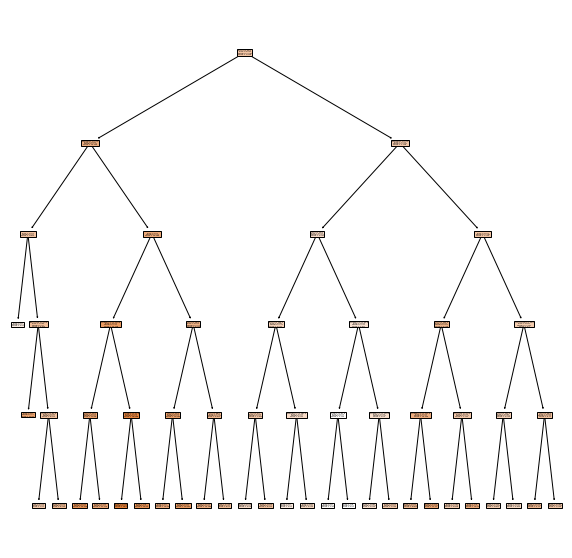

In [177]:
plt.figure(figsize=(10,10))
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
tree.plot_tree(model,feature_names=fn,filled=True)